In [75]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import math

Training data

| Size (1000 sqft)     | Price (1000s of dollars) |
| -------------------| ------------------------ |
| 1.0               | 300                      |
| 2.0               | 500                      |

In [76]:
# Defining training data

x_train = np.array([1, 2])
y_train = np.array([300, 500])

print(f"Input features are {x_train}")
print(f"Target variables are {y_train}")

Input features are [1 2]
Target variables are [300 500]


Next step is to calculate the cost

cost function is 

1/m Sigma ((wx + b) - y)**2

In [77]:
def compute_costs(x, y, w, b):
    m = x.shape[0]
    cost = 0

    for i in range(m):
        f_wb = w * x[i] + b
        cost += (f_wb - y[i])**2

    total_cost = cost / m 
    
    return total_cost

$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$


We need to calculate the above, for that we need the derivative value

In [78]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_dw += dj_dw_i
        dj_db += dj_db_i

    dj_dw = dj_dw / m  
    dj_db = dj_db / m

    return dj_dw, dj_db  

In [80]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    J_history = []
    p_history = []

    w = w_in
    b = b_in

    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)

        # Convert to float if needed
        dj_dw = float(dj_dw) if isinstance(dj_dw, np.float64) else dj_dw
        dj_db = float(dj_db) if isinstance(dj_db, np.float64) else dj_db

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        J_history.append(cost_function(x, y, w, b))
        p_history.append([w, b])

        if i % max(1, math.ceil(num_iters / 10)) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b: {b: 0.5e}")

    return w, b, J_history, p_history


In [99]:
w_init = 0
b_init = 0

iterations = 5000
alpha = 0.01


w, b, J_history, p_history = gradient_descent(x_train, y_train, w_init, b_init, alpha, iterations, compute_costs, compute_gradient)
print(f'Final w is {w}')
print(f'Final b is {b}')

Iteration    0: Cost 1.59e+05  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  6.500e+00, b:  4.00000e+00
Iteration  500: Cost 1.42e+01  dj_dw: -5.347e-01, dj_db:  8.651e-01   w:  1.927e+02, b:  1.11851e+02
Iteration 1000: Cost 6.83e+00  dj_dw: -3.712e-01, dj_db:  6.007e-01   w:  1.949e+02, b:  1.08228e+02
Iteration 1500: Cost 3.29e+00  dj_dw: -2.577e-01, dj_db:  4.170e-01   w:  1.965e+02, b:  1.05713e+02
Iteration 2000: Cost 1.59e+00  dj_dw: -1.789e-01, dj_db:  2.895e-01   w:  1.975e+02, b:  1.03966e+02
Iteration 2500: Cost 7.64e-01  dj_dw: -1.242e-01, dj_db:  2.010e-01   w:  1.983e+02, b:  1.02754e+02
Iteration 3000: Cost 3.68e-01  dj_dw: -8.625e-02, dj_db:  1.396e-01   w:  1.988e+02, b:  1.01912e+02
Iteration 3500: Cost 1.78e-01  dj_dw: -5.989e-02, dj_db:  9.690e-02   w:  1.992e+02, b:  1.01327e+02
Iteration 4000: Cost 8.56e-02  dj_dw: -4.158e-02, dj_db:  6.727e-02   w:  1.994e+02, b:  1.00922e+02
Iteration 4500: Cost 4.13e-02  dj_dw: -2.887e-02, dj_db:  4.671e-02   w:  1.996e+02, b:  1.

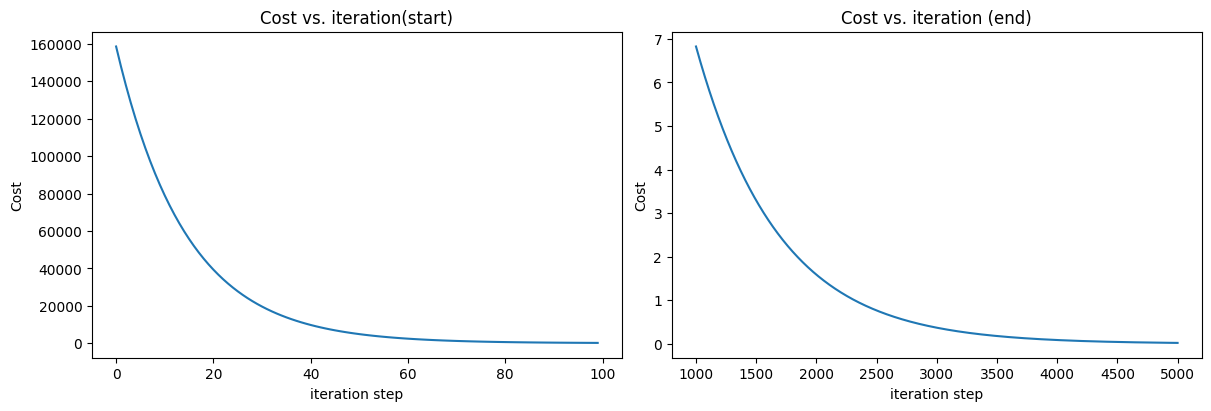

In [100]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_history[:100])
ax2.plot(1000 + np.arange(len(J_history[1000:])), J_history[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()